In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

%matplotlib inline

In [2]:
df_1 = pd.read_csv(r"C:\Users\Cecilia\Downloads\ironhack\coursework\group_work\group_project_week5_6\second_project\data\clean\combined_cleaned_data1.csv")

In [3]:
def clean_df_final_demo():
    #key fields client_id, clnt_age, gender, num_accts, balance, clnt_tenure_yr
    df_copy = pd.read_csv("df_final_demo.txt")
    df_copy = df_copy.dropna()
    corrected_columns = {"gendr" : "gender", "bal" : "balance"}
    df_copy.rename(columns=corrected_columns, inplace = True)
    df_copy = df_copy[df_copy['gender'] != 'X']    
    gender_mapping = {
    'M': 'Male',
    'F': 'Female',
    'U': 'Unknown',
    }
    df_copy['gender'] = df_copy['gender'].map(gender_mapping)
    return df_copy

df_1 = clean_df_final_demo()

In [4]:
def clean_df_experiment_clients():
    df_copy = pd.read_csv("df_final_experiment_clients.txt")
    df_copy = df_copy.dropna() # dropping the NaN values
    df_copy.rename(columns={'Variation': 'variation'}, inplace=True)
    return df_copy

df_3 = clean_df_experiment_clients()

In [5]:
df_merged = df_1.merge(df_3, on='client_id', how='inner')
df_merged.dtypes
df_1["client_id"].nunique()

70591

clnt_age
58.5    859
55.5    830
29.5    829
28.5    827
57.5    826
       ... 
96.0      2
14.0      2
94.5      1
95.5      1
13.5      1
Name: count, Length: 165, dtype: int64


Text(29.222222222222214, 0.5, 'Number of clients')

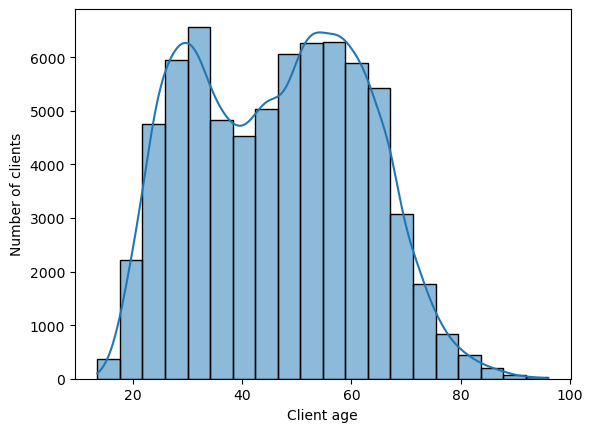

In [6]:
# -------------------------------------
# Demographics analysis
# -------------------------------------
# #####################################
# age analysis
# #####################################
print(df_1['clnt_age'].value_counts());
sns.histplot(df_1['clnt_age'], bins=20, kde=True)
plt.xlabel('Client age')
plt.savefig("client_age.png", dpi=300)
plt.ylabel('Number of clients')

## Gender analysis

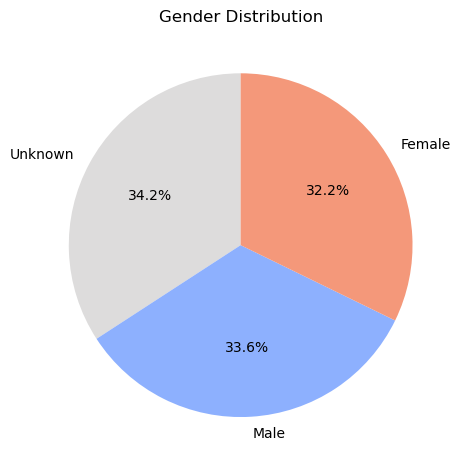

In [7]:
# overview
# #####################################

primary_clients = df_1.groupby('gender').agg({
    'clnt_age': ['mean', 'median'],
    'clnt_tenure_yr': ['mean', 'median'],
    'balance': ['mean', 'median']
})

# Define the custom color palette from coolwarm
# We'll take three distinct colors from the coolwarm palette
palette = sns.color_palette("coolwarm", n_colors=3)  # Get 3 colors from the coolwarm palette

# Mapping the colors to gender categories manually (assuming the unique genders are "Male", "Female", "Unknown")
gender_colors = {
    'Male': palette[0],  # First color (coolest color in coolwarm palette)
    'Female': palette[2],  # Last color (warmest color in coolwarm palette)
    'Unknown': palette[1]  # Middle color
}

# Plot the gender distribution pie chart
fig, ax = plt.subplots()
df_1['gender'].value_counts().plot(
    kind='pie',
    autopct=lambda pct: f'{pct:.1f}%',  # Format percentages
    colors=[gender_colors.get(gender, 'grey') for gender in df_merged['gender'].value_counts().index],  # Apply custom colors based on gender
    startangle=90,  # Start from 90 degrees for better alignment
    ax=ax
)

# Add a title
plt.title('Gender Distribution')
plt.ylabel('')  # Suppress the default ylabel
plt.tight_layout()  # Ensure no clipping of text
plt.savefig("gender_distribution_coolwarm.png", dpi=300)
plt.show()


### Tenure Distribution

tenure_mean: 12.05
balance_mean: 147451.82


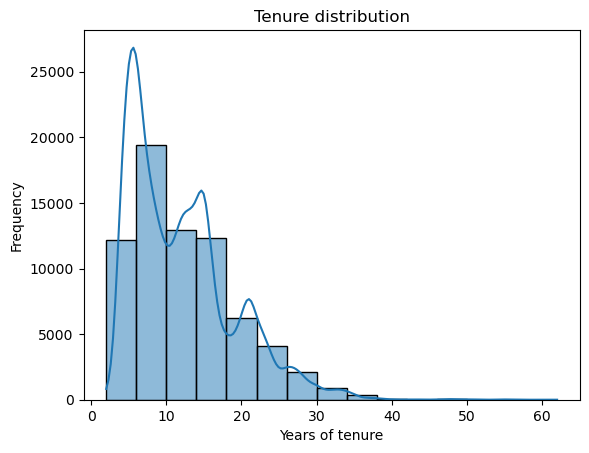

In [8]:
# how long clients have been with Vanguard
# #####################################
print("tenure_mean:", df_1['clnt_tenure_yr'].mean().round(2))
print("balance_mean:", df_1['balance'].mean().round(2))

# #####################################
sns.histplot(df_1['clnt_tenure_yr'], bins=15, kde=True)
plt.title('Tenure distribution')
plt.xlabel('Years of tenure')
plt.ylabel('Frequency')
plt.savefig("client_tenure.png", format='png', dpi=300);


plt.show()

### Age groups sorted by tenure and balance

In [9]:
# Define age bins and categorize ages
bins = [0, 30, 40, 50, 100]  # Age intervals
labels = ['Under 30', '30-39', '40-49', '50 and above']
df_1['age_group'] = pd.cut(df_1['clnt_age'], bins=bins, labels=labels)

# Group by gender and age group, aggregating both tenure and balance
client_age_tenure_balance = df_1.groupby(['gender', 'age_group']).agg({
    'clnt_tenure_yr': 'mean',
    'balance': 'mean'
}).reset_index().round(2)

# Find the group with the maximum average tenure
highest_tenure_group = client_age_tenure_balance.loc[client_age_tenure_balance['clnt_tenure_yr'].idxmax()]

# Find the group with the maximum average balance
highest_balance_group = client_age_tenure_balance.loc[client_age_tenure_balance['balance'].idxmax()]

print("Group with highest average tenure and balance:")
print(highest_tenure_group)

# Display the aggregated DataFrame
client_age_tenure_balance

Group with highest average tenure and balance:
gender                    Male
age_group         50 and above
clnt_tenure_yr           16.35
balance              294239.72
Name: 7, dtype: object


C:\Users\Cecilia\AppData\Local\Temp\ipykernel_28308\2027405315.py:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  client_age_tenure_balance = df_1.groupby(['gender', 'age_group']).agg({


,gender,age_group,clnt_tenure_yr,balance
0,Female,Under 30,12.76,60742.89
1,Female,30-39,12.85,89694.76
2,Female,40-49,14.58,128289.63
3,Female,50 and above,16.01,171375.16
4,Male,Under 30,12.56,81371.34
5,Male,30-39,13.00,125414.35
6,Male,40-49,14.72,186014.14
7,Male,50 and above,16.35,294239.72
8,Unknown,Under 30,5.91,51886.95
9,Unknown,30-39,6.48,80474.88


### Line charts per age group x balance / client tenure

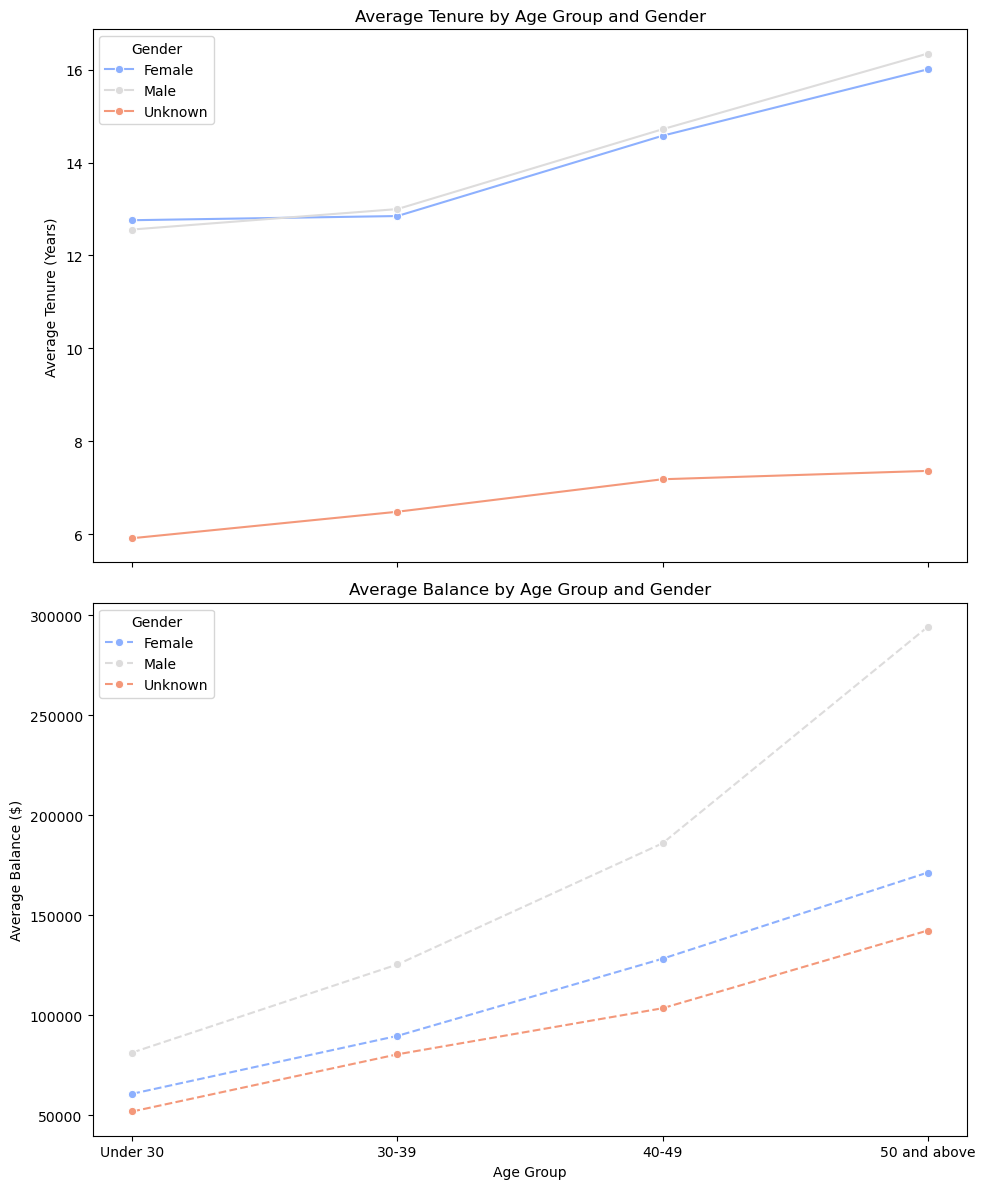

In [10]:
fig, axes = plt.subplots(2, 1, figsize=(10, 12), sharex=True)

# Line Plot for Tenure
sns.lineplot(
    data=client_age_tenure_balance,
    x='age_group',
    y='clnt_tenure_yr',
    hue='gender',
    marker='o',
    ax=axes[0],
    palette='coolwarm'
)
axes[0].set_title("Average Tenure by Age Group and Gender")
axes[0].set_ylabel("Average Tenure (Years)")
axes[0].set_xlabel("")
axes[0].legend(title="Gender")

# Line Plot for Balance
sns.lineplot(
    data=client_age_tenure_balance,
    x='age_group',
    y='balance',
    hue='gender',
    marker='o',
    linestyle='--',
    ax=axes[1],
    palette='coolwarm'
)
axes[1].set_title("Average Balance by Age Group and Gender")
axes[1].set_ylabel("Average Balance ($)")
axes[1].set_xlabel("Age Group")
axes[1].legend(title="Gender")

plt.tight_layout()
plt.savefig("average_accounts.png")

plt.show()


In [11]:
# Define age bins and categorize ages
bins = [0, 30, 40, 50, 100]  # Age intervals
labels = ['Under 30', '30-39', '40-49', '50 and above']
df_1['age_group'] = pd.cut(df_1['clnt_age'], bins=bins, labels=labels)

# Group by gender and age group, aggregating both tenure and balance
logs_calls_accounts = df_1.groupby(['gender', 'age_group']).agg({
    'num_accts': 'mean',
    'calls_6_mnth': 'mean',
    'logons_6_mnth': 'mean'
}).reset_index().round(2)

# Display the aggregated DataFrame
logs_calls_accounts

C:\Users\Cecilia\AppData\Local\Temp\ipykernel_28308\2292707602.py:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  logs_calls_accounts = df_1.groupby(['gender', 'age_group']).agg({


,gender,age_group,num_accts,calls_6_mnth,logons_6_mnth
0,Female,Under 30,2.25,3.16,5.02
1,Female,30-39,2.23,2.83,5.02
2,Female,40-49,2.23,2.91,5.05
3,Female,50 and above,2.22,3.23,5.53
4,Male,Under 30,2.31,3.81,5.70
5,Male,30-39,2.33,3.55,5.74
6,Male,40-49,2.31,3.45,5.58
7,Male,50 and above,2.34,3.84,6.12
8,Unknown,Under 30,2.25,3.53,5.56
9,Unknown,30-39,2.24,3.20,5.50


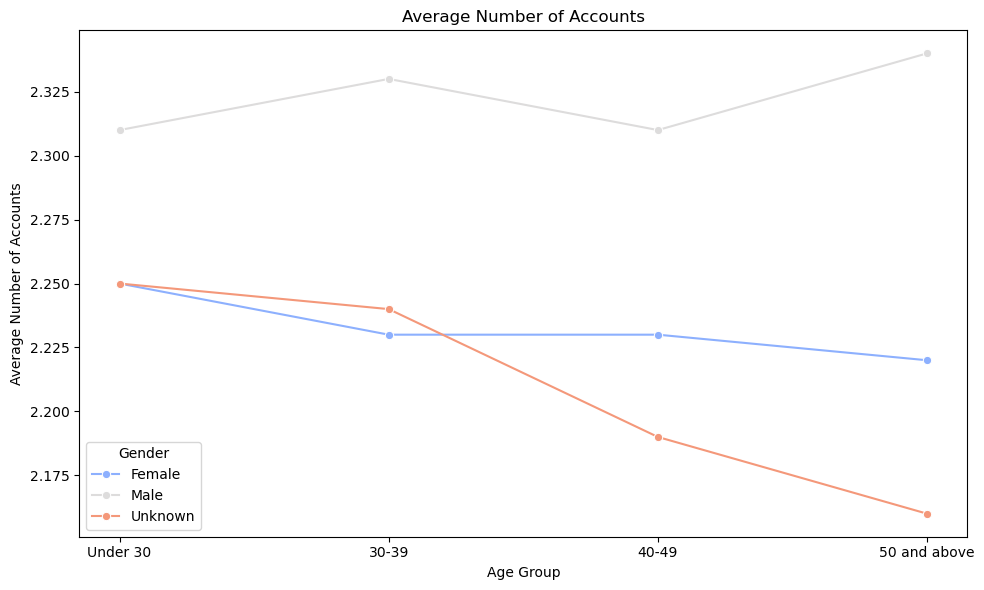

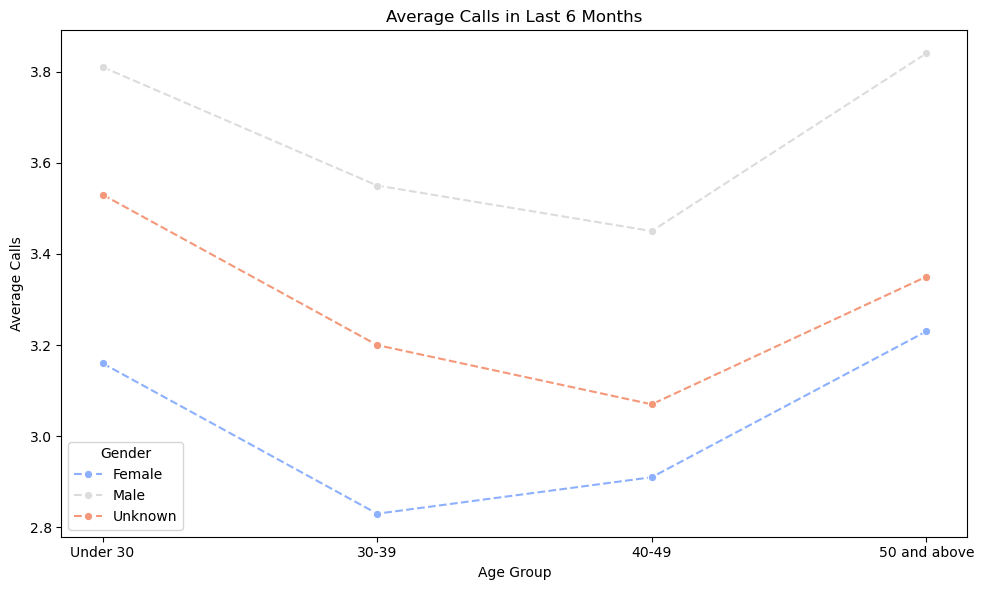

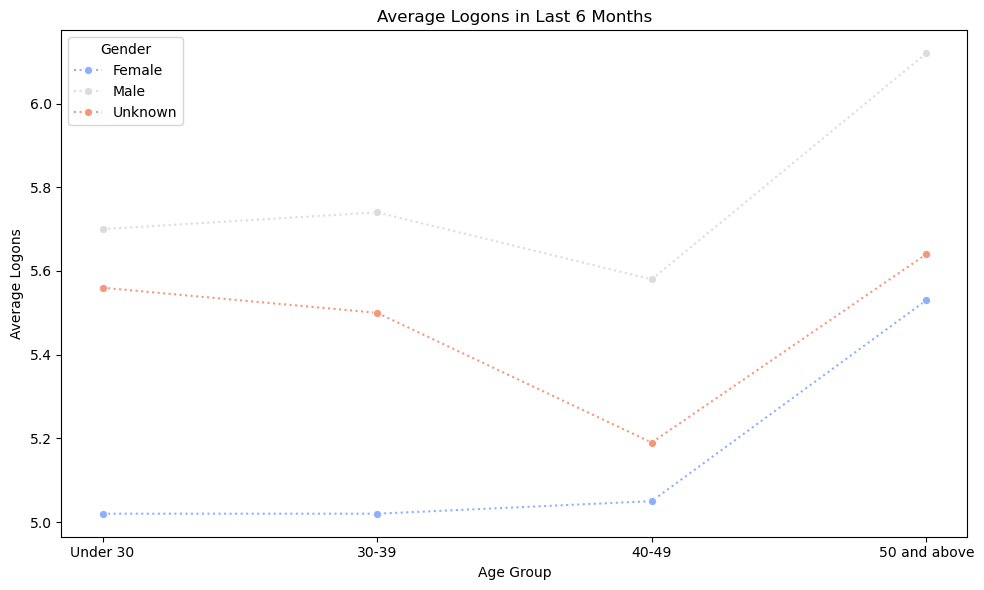

In [12]:
# Plot for Number of Accounts
plt.figure(figsize=(10, 6))
sns.lineplot(
    data=logs_calls_accounts,
    x='age_group',
    y='num_accts',
    hue='gender',
    marker='o',
    palette='coolwarm'
)
plt.title("Average Number of Accounts")
plt.ylabel("Average Number of Accounts")
plt.xlabel("Age Group")
plt.legend(title="Gender")
plt.tight_layout()
plt.savefig("average_accounts.png")
plt.show()

# Plot for Calls in the Last 6 Months
plt.figure(figsize=(10, 6))
sns.lineplot(
    data=logs_calls_accounts,
    x='age_group',
    y='calls_6_mnth',
    hue='gender',
    marker='o',
    linestyle='--',
    palette='coolwarm'
)
plt.title("Average Calls in Last 6 Months")
plt.ylabel("Average Calls")
plt.xlabel("Age Group")
plt.legend(title="Gender")
plt.tight_layout()
plt.savefig("average_calls.png")
plt.show()

# Plot for Logons in the Last 6 Months
plt.figure(figsize=(10, 6))
sns.lineplot(
    data=logs_calls_accounts,
    x='age_group',
    y='logons_6_mnth',
    hue='gender',
    marker='o',
    linestyle=':',
    palette='coolwarm'
)
plt.title("Average Logons in Last 6 Months")
plt.ylabel("Average Logons")
plt.xlabel("Age Group")
plt.legend(title="Gender")
plt.tight_layout()
plt.savefig("average_logs.png")
plt.show()

